In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [24]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1",
        "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df=pd.read_csv('magic04.data',names=cols)
df['class']=(df['class']=='g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [25]:
x=df.drop(columns=['class']).values
y=df['class'].values

In [26]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp, test_size=0.5, random_state=42)

In [27]:
ros=RandomOverSampler()
x_train,y_train=ros.fit_resample(x_train,y_train)

In [30]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_val_scaled=scaler.transform(x_val)
x_test_scaled=scaler.transform(x_test)

In [31]:
NB=GaussianNB()
NB.fit(x_train_scaled,y_train)

GaussianNB()

In [32]:
NB_pred=NB.predict(x_test_scaled)

In [33]:
print(classification_report(y_test,NB_pred))

              precision    recall  f1-score   support

           0       0.73      0.39      0.50      1007
           1       0.73      0.92      0.82      1846

    accuracy                           0.73      2853
   macro avg       0.73      0.65      0.66      2853
weighted avg       0.73      0.73      0.71      2853



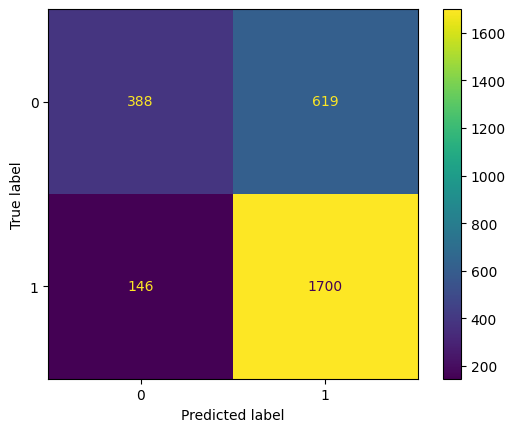

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, NB_pred, labels=NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NB.classes_)
disp.plot()
plt.show()